In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('lixas111.csv')

In [3]:
df_one_hot = pd.get_dummies(df, columns=['job','marital','education','default','housing','loan','contact','poutcome'])
df_one_hot

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,29,751,23,121,2,-1,0,no,0,0,...,1,1,0,0,0,1,0,0,0,1
1,47,6695,21,129,3,-1,0,no,1,0,...,0,1,0,0,1,0,0,0,0,1
2,26,82,5,228,1,-1,0,no,1,0,...,1,1,0,0,0,1,0,0,0,1
3,66,53,12,562,4,-1,0,yes,0,0,...,0,1,0,1,0,0,0,0,0,1
4,36,127,18,172,3,-1,0,no,0,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,47,4157,11,90,3,-1,0,no,0,1,...,0,1,0,0,0,1,0,0,0,1
3996,53,2124,17,121,2,344,2,no,0,0,...,1,1,0,1,0,0,1,0,0,0
3997,30,31,8,229,1,-1,0,no,0,0,...,0,1,0,0,0,1,0,0,0,1
3998,43,743,23,323,3,-1,0,no,0,0,...,0,0,1,1,0,0,0,0,0,1


In [4]:
df_x = df_one_hot.drop('y', axis=1)
df_x = df_x.drop('duration',axis=1)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Use the fit_transform method to standardize the data
df_standardized = scaler.fit_transform(df_x)

# The standardized data is now scaled to have a mean of 0 and a standard deviation of 1
print(df_standardized)


[[-1.12230728 -0.23191969  0.89009003 ... -0.19394197 -0.22331316
   0.49609064]
 [ 0.54910554  1.79296023  0.648152   ... -0.19394197 -0.22331316
   0.49609064]
 [-1.40087608 -0.45982088 -1.28735229 ... -0.19394197 -0.22331316
   0.49609064]
 ...
 [-1.02945101 -0.47719452 -0.92444524 ... -0.19394197 -0.22331316
   0.49609064]
 [ 0.17768047 -0.23464497  0.89009003 ... -0.19394197 -0.22331316
   0.49609064]
 [ 1.10624314 -0.46561209  0.16427593 ... -0.19394197 -0.22331316
   0.49609064]]


In [23]:
df_x_standardised = pd.DataFrame(columns=df_x.columns,data=df_standardized)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
df_y = df_one_hot['y']

df_y

le = LabelEncoder()


y = le.fit_transform(df_y)

In [9]:
df_y = pd.DataFrame(y, columns=['y'])
df_y

,y
0,0
1,0
2,0
3,1
4,0
...,...
3995,0
3996,0
3997,0
3998,0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df_x_standardised, df_y, test_size=0.20, random_state=42)

In [12]:
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

<ipython-input-12-a12aa33726fa>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestClassifier.fit(X_train, y_train)


RandomForestClassifier()

In [13]:
predictions = RandomForestClassifier.predict(X_test)

In [14]:
accuracy = accuracy_score(y_test, predictions)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.81


In [15]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
print(f"Model precision: {precision:.2f}")
print(f"Model recall: {recall:.2f}")

Model precision: 0.56
Model recall: 0.36


In [16]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, predictions)
print(f"Model f1-score: {f1:.2f}")

Model f1-score: 0.44


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[590  46]
 [105  59]]


In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Define the KFold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

# Use the cross_val_score function to evaluate the model using K-fold cross-validation
scores = cross_val_score(RandomForestClassifier, df_x_standardised, df_y, cv=kfold)

# Print the mean and standard deviation of the scores
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Accuracy: 81.65% (0.83%)


In [19]:
from sklearn.inspection import permutation_importance
import time
feature_names = [f"feature {i}" for i in range(df_x_standardised.shape[1])]
start_time = time.time()
result = permutation_importance(RandomForestClassifier, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 26.598 seconds


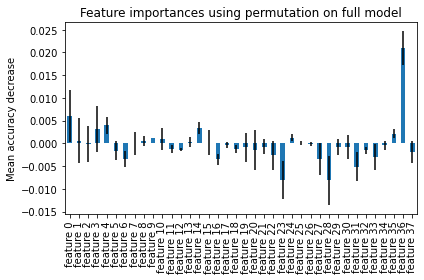

In [20]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [24]:
df_x_standardised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  4000 non-null   float64
 1   balance              4000 non-null   float64
 2   day                  4000 non-null   float64
 3   campaign             4000 non-null   float64
 4   pdays                4000 non-null   float64
 5   previous             4000 non-null   float64
 6   job_admin.           4000 non-null   float64
 7   job_blue-collar      4000 non-null   float64
 8   job_entrepreneur     4000 non-null   float64
 9   job_housemaid        4000 non-null   float64
 10  job_management       4000 non-null   float64
 11  job_retired          4000 non-null   float64
 12  job_self-employed    4000 non-null   float64
 13  job_services         4000 non-null   float64
 14  job_student          4000 non-null   float64
 15  job_technician       4000 non-null   f